In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import *
import tensorflow.keras
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.math import l2_normalize
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
(xtrain,ytrain),(xtest,ytest)=imdb.load_data(num_words=10000)

In [ ]:
word_idx=imdb.get_word_index() #getting vocab from imdb data

In [ ]:
data = np.concatenate([xtrain, xtest], axis = 0)
label  = np.concatenate([ytrain, ytest], axis = 0)



In [ ]:
idx_word=dict([(value,key) for (key,value) in word_idx.items()])
actual_review=[idx_word.get(idx-3,'#') for idx in xtrain[0]] #if key is not present # will be used
actual_review=' '.join(actual_review)
print(actual_review)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [ ]:
maxlen=500
data_pad  = pad_sequences(data,maxlen=maxlen,padding='post')

In [ ]:
data_pad.shape

(50000, 500)

In [ ]:
# maxlen=500
# xtrain=pad_sequences(xtrain,maxlen=maxlen,padding='post')
# xtest=pad_sequences(xtest,maxlen=maxlen,padding='post')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, remain_x, ytrain, remain_y = train_test_split(data_pad, label, test_size=0.3, shuffle=True)
xval, xtest, yval, ytest = train_test_split(remain_x, remain_y, test_size=0.5, shuffle=True)



In [ ]:
xtrain.shape

(35000, 500)

In [ ]:
xtrain=np.asarray(xtrain).astype('float32')
xtest=np.asarray(xtest).astype('float32')
ytrain=np.asarray(ytrain).astype('float32')
ytest=np.asarray(ytest).astype('float32')

train=tf.data.Dataset.from_tensor_slices((xtrain,ytrain)).batch(128)
test=tf.data.Dataset.from_tensor_slices((xtest,ytest)).batch(128)

In [ ]:

xtrain=np.asarray(xtrain).astype('float32')
xtest=np.asarray(xtest).astype('float32')
ytrain=np.asarray(ytrain).astype('float32')
ytest=np.asarray(ytest).astype('float32')
print(xtrain.shape,xtest.shape)
print(ytrain.shape,ytest.shape)

(35000, 500) (7500, 500)
(35000,) (7500,)


In [ ]:
len(word_idx)

NameError: name 'word_idx' is not defined

In [ ]:
vocab_size,emb_dimension=len(word_idx),32

# Model base

In [ ]:
inputs = Input(shape=(maxlen,))
embedding = Embedding(vocab_size, 32,trainable=True)(inputs)
#channel 1
x = Conv1D(filters=128, kernel_size=3*32, activation='relu')(embedding)
x= MaxPooling1D(pool_size=2)(x)
x= Dropout(0.5)(x)
x= BatchNormalization()(x)
a=LSTM(128)(x)

# channel 2
x = Conv1D(filters=128, kernel_size=5*32, activation='relu')(embedding)
x= MaxPooling1D(pool_size=2)(x)
x= Dropout(0.5)(x)
x= BatchNormalization()(x)
b=LSTM(128)(x)

# channel 3
x = Conv1D(filters=128, kernel_size=7*32, activation='relu')(embedding)
x= MaxPooling1D(pool_size=2)(x)
x= Dropout(0.5)(x)
x= BatchNormalization()(x)
c=LSTM(128)(x)

# channel 4
x = Conv1D(filters=128, kernel_size=9*32, activation='relu')(embedding)
x= MaxPooling1D(pool_size=2)(x)
x= Dropout(0.5)(x)
x= BatchNormalization()(x)
d=LSTM(128)(x)

merged=concatenate([a,b,c,d])
dense=Dense(100, activation='relu')(merged)
drop=Dropout(0.2)(dense)
outputs = Dense(1, activation='sigmoid')(merged)
#model
model = Model(inputs=inputs, outputs=outputs)
# compile
opt=RMSprop(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 500)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 500, 32)              2834688   ['input_1[0][0]']             
                                                                                                  
 conv1d (Conv1D)             (None, 405, 128)             393344    ['embedding[0][0]']           
                                                                                                  
 conv1d_1 (Conv1D)           (None, 341, 128)             655488    ['embedding[0][0]']           
                                                                                              

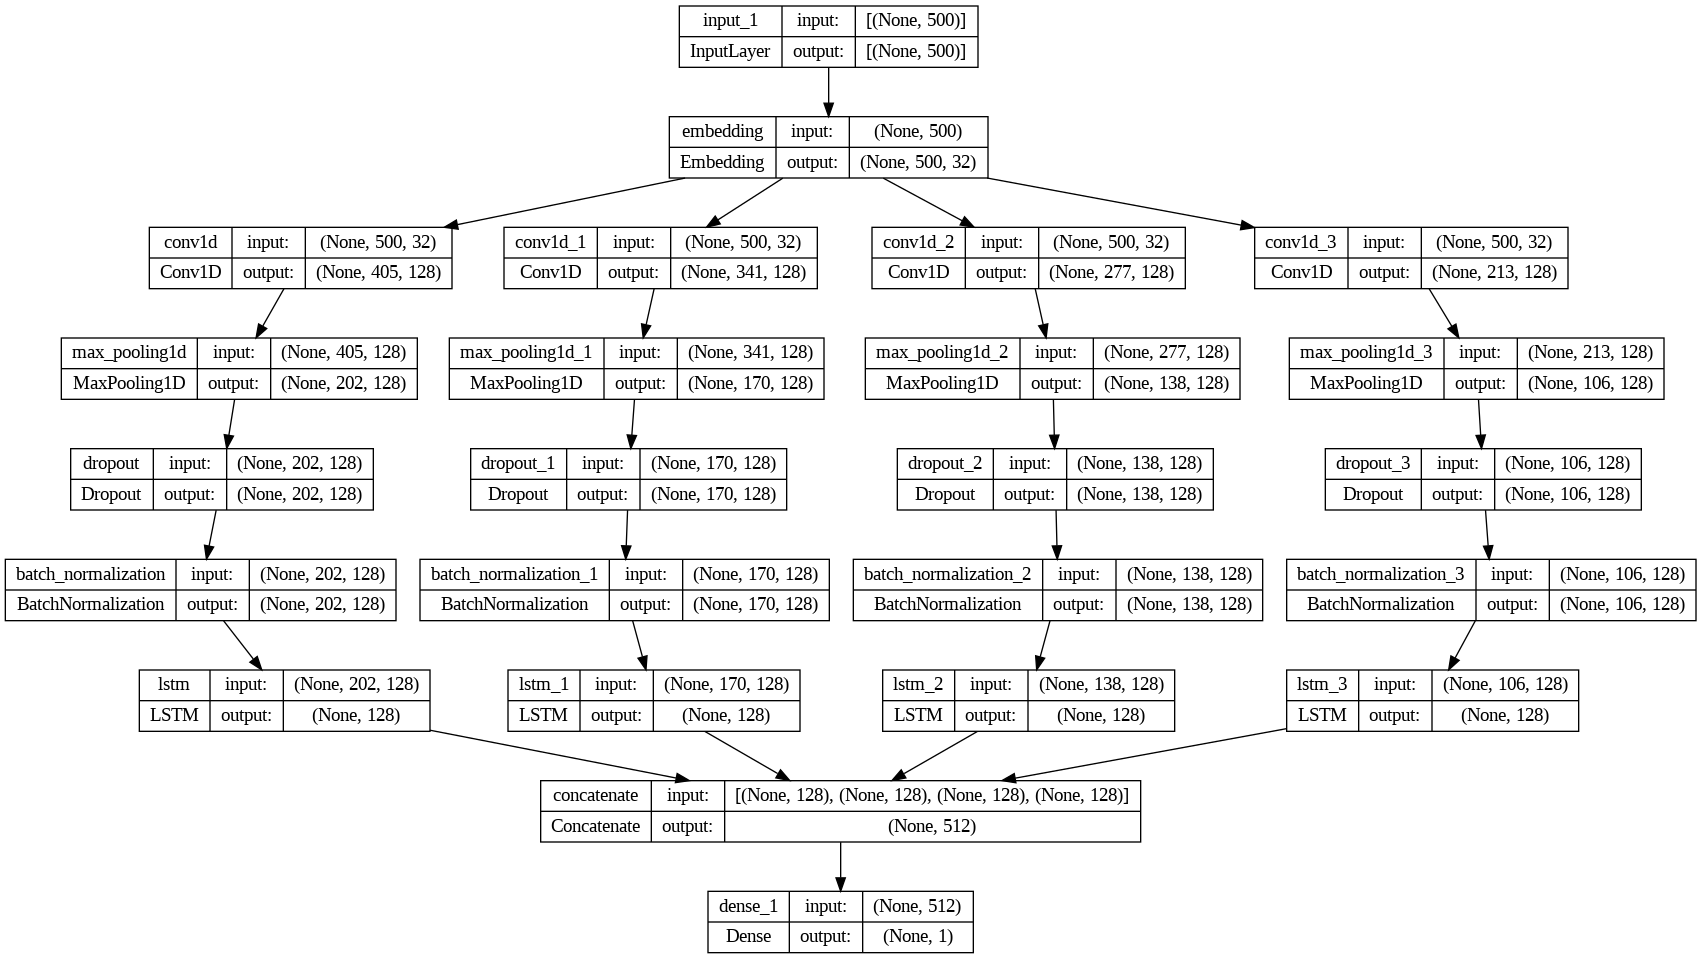

In [ ]:
plot_model(model, show_shapes=True, to_file='model_base.png')

In [ ]:


hist=model.fit(xtrain,ytrain,batch_size=32,epochs=2,validation_data=(xval,yval),validation_batch_size=128)

Epoch 1/2
1094/1094 [==============================] - 111s 101ms/step - loss: 0.5617 - accuracy: 0.6653 - val_loss: 0.3454 - val_accuracy: 0.8508
Epoch 2/2
1094/1094 [==============================] - 79s 72ms/step - loss: 0.3138 - accuracy: 0.8708 - val_loss: 0.7153 - val_accuracy: 0.7125


In [ ]:

opt=Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
hist=model.fit(xtrain,ytrain,batch_size=256,epochs=10,validation_data=(xval,yval),validation_batch_size=256)

Epoch 1/10
137/137 [==============================] - 82s 453ms/step - loss: 0.6730 - accuracy: 0.5569 - val_loss: 0.6706 - val_accuracy: 0.5864
Epoch 2/10
137/137 [==============================] - 51s 375ms/step - loss: 0.5181 - accuracy: 0.7427 - val_loss: 0.5598 - val_accuracy: 0.7480
Epoch 3/10
137/137 [==============================] - 51s 375ms/step - loss: 0.3922 - accuracy: 0.8351 - val_loss: 1.3115 - val_accuracy: 0.5372
Epoch 4/10
137/137 [==============================] - 51s 374ms/step - loss: 0.3825 - accuracy: 0.8336 - val_loss: 0.9596 - val_accuracy: 0.6160
Epoch 5/10
137/137 [==============================] - 52s 377ms/step - loss: 0.3182 - accuracy: 0.8734 - val_loss: 0.3589 - val_accuracy: 0.8607
Epoch 6/10
137/137 [==============================] - 51s 373ms/step - loss: 0.3272 - accuracy: 0.8514 - val_loss: 0.6571 - val_accuracy: 0.7576
Epoch 7/10
137/137 [==============================] - 52s 376ms/step - loss: 0.3315 - accuracy: 0.8537 - val_loss: 0.4583 - val_ac

In [ ]:
model.evaluate(xtest,ytest)

235/235 [==============================] - 6s 19ms/step - loss: 0.3543 - accuracy: 0.8788


[0.35434335470199585, 0.8787999749183655]

In [ ]:
y_out = model.predict(xtest)

235/235 [==============================] - 5s 17ms/step


In [ ]:
y_pre = np.array([1 if i > 0.5 else 0 for i in y_out])

In [ ]:
y_pre

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
ytest

array([1., 0., 1., ..., 1., 0., 1.], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_true=ytest, y_pred=y_pre)

0.8788

In [ ]:
cm= confusion_matrix(y_true=ytest, y_pred=y_pre)

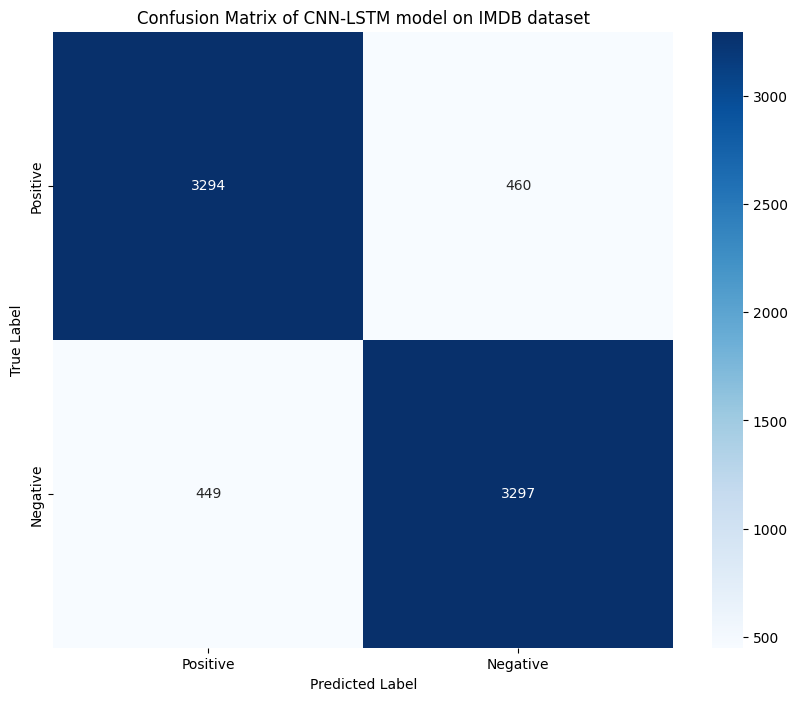

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', "Negative"], yticklabels=['Positive', "Negative"])
plt.title(f'Confusion Matrix of CNN-LSTM model on IMDB dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Model Architecture

In [ ]:
class MyModel(Model):

  def __init__(self,vocab_size,emb_dimension):
    super(MyModel, self).__init__()
    self.emb=Embedding(vocab_size,emb_dimension,trainable=True)
    self.conv1=Conv1D(filters=64, kernel_size=5,activation='elu',kernel_regularizer=tf.keras.regularizers.l2(l=0.01))
    self.pool1=MaxPooling1D(pool_size=2)
    self.bn1=BatchNormalization()
    # convLayer2
    self.conv2=Conv1D(filters=128, kernel_size=6,activation='elu',kernel_regularizer=tf.keras.regularizers.l2(l=0.01))
    self.pool2=MaxPooling1D(pool_size=4)
    self.bn2=BatchNormalization()
    # convLayer3
    self.conv3=Conv1D(filters=128, kernel_size=7,activation='elu',kernel_regularizer=tf.keras.regularizers.l2(l=0.01))
    self.pool3=MaxPooling1D(pool_size=8)
    self.bn3=BatchNormalization()

    self.lstm1=GRU(128)

    self.y=MaxPooling1D(pool_size=2)
    self.lstm2=GRU(128)

    # self.concat=concatenate([x,y])

    self.dense=Dense(1, activation='sigmoid')

  def call(self,input):
    a=self.emb(input)
    x=self.conv1(a)
    x=self.pool1(x)
    x=self.bn1(x)
    # convLayer2
    x=self.conv2(x)
    x=self.pool2(x)
    x=self.bn2(x)
    # convLayer3
    x=self.conv3(x)
    x=self.pool3(x)
    x=self.bn3(x)

    x=self.lstm1(x)

    z=self.y(a)
    z=self.lstm2(z)

    x=concatenate([x,z])

    return self.dense(x)

In [ ]:
model=MyModel(vocab_size=vocab_size,emb_dimension=emb_dimension)


In [ ]:
train_acc_metric = tf.keras.metrics.BinaryAccuracy()
val_acc_metric = tf.keras.metrics.BinaryAccuracy()

In [ ]:
loss=tf.keras.losses.BinaryCrossentropy()
optimizer=RMSprop(learning_rate=0.005)
epoch_losses = []
total_epochs=8

# Training

In [ ]:
import time

In [ ]:
def model_training():
  for epoch in range(total_epochs):
    start = time.time()
    batch_losses=[]
    for inputs, outputs in train:
      with tf.GradientTape() as tape:
        current_loss = loss(model(inputs), outputs)
        grads=tape.gradient(current_loss, model.trainable_variables)
      optimizer.apply_gradients(zip(grads, model.trainable_variables))
      batch_losses.append(current_loss)

      train_acc_metric.update_state(outputs,model(inputs))

    for inputs, outputs in test:
      val_acc_metric.update_state(outputs,model(inputs))

    train_acc = train_acc_metric.result().numpy()
    train_acc_metric.reset_states()

    val_acc = val_acc_metric.result().numpy()
    val_acc_metric.reset_states()
    end  = time.time() - start
    print("epoch ",epoch,", Training acc : " , train_acc,end="")
    print("  Validation acc: ",val_acc)
    print("Time: ", end)

In [ ]:
model_training()

epoch  0 , Training acc :  0.50012  Validation acc:  0.5
epoch  1 , Training acc :  0.5  Validation acc:  0.5
epoch  2 , Training acc :  0.5  Validation acc:  0.5
epoch  3 , Training acc :  0.5  Validation acc:  0.5


KeyboardInterrupt: 

In [ ]:
optimizer=RMSprop(learning_rate=0.0005)
total_epochs=5
model_training()

epoch  0 , Training acc :  0.94375  Validation acc:  0.88999516
epoch  1 , Training acc :  0.9470185  Validation acc:  0.89243466
epoch  2 , Training acc :  0.94968915  Validation acc:  0.89371014
epoch  3 , Training acc :  0.9513234  Validation acc:  0.8929448
epoch  4 , Training acc :  0.95319676  Validation acc:  0.89398915


In [ ]:
model.save_weights('drive/My Drive/Colab_files/model_101.h5')

Tried many learning rates with RMSprop but couldn't improve accuracy irrespective of how big or small is the learning rate so changed the optimiser.

In [ ]:
optimizer=SGD(learning_rate=0.007)
total_epochs=5
model_training()

epoch  0 , Training acc :  0.9576212  Validation acc:  0.8879066
epoch  1 , Training acc :  0.9596142  Validation acc:  0.8940529
epoch  2 , Training acc :  0.9609296  Validation acc:  0.89308834
epoch  3 , Training acc :  0.96104914  Validation acc:  0.89373404
epoch  4 , Training acc :  0.96192604  Validation acc:  0.89393336


changing the optimizer also didn't help.

In [ ]:
model.save_weights('drive/My Drive/Colab_files/model_101.h5')

In [ ]:
model(xtrain[:2,:])
model.load_weights('drive/My Drive/Colab_files/model_101.h5')

In [ ]:
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  160000    
_________________________________________________________________
conv1d (Conv1D)              multiple                  10304     
_________________________________________________________________
max_pooling1d (MaxPooling1D) multiple                  0         
_________________________________________________________________
batch_normalization (BatchNo multiple                  256       
_________________________________________________________________
conv1d_1 (Conv1D)            multiple                  49280     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 multiple                  0         
_________________________________________________________________
batch_normalization_1 (Batch multiple                  512

In [ ]:
metric = tf.keras.metrics.AUC()
for inputs, outputs in test:
  metric.update_state(outputs,model(inputs))
auc=metric.result().numpy()

metric = tf.keras.metrics.BinaryAccuracy()
for inputs, outputs in test:
  metric.update_state(outputs,model(inputs))
acc=metric.result().numpy()

metric = tf.keras.metrics.Precision()
for inputs, outputs in test:
  metric.update_state(outputs,model(inputs))
pre=metric.result().numpy()

metric = tf.keras.metrics.Recall()
for inputs, outputs in test:
  metric.update_state(outputs,model(inputs))
recall=metric.result().numpy()

print('AUC: ',auc)
print('Accuracy: ',acc)
print('Precision: ',pre)
print('Recall: ',recall)

AUC:  0.9039802
Accuracy:  0.89393336
Precision:  0.89814067
Recall:  0.8888


# Tweeter dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data = pd.read_csv("/content/train_tweet.csv")
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
from tqdm import tqdm
tqdm.pandas()

In [ ]:
data['token_length'] = data.tweet.progress_apply(lambda x: len(x.split()))
data_pos = data[data['label'] == 1]
data_pos['token_length'].describe()

100%|██████████| 21602/21602 [00:00<00:00, 173006.07it/s]


count    1493.000000
mean       14.127261
std         4.927886
min         3.000000
25%        11.000000
50%        14.000000
75%        17.000000
max        30.000000
Name: token_length, dtype: float64

In [ ]:
# data['token_length'] = data.text.progress_apply(lambda x: len(x.split()))
# data_pos = data[data['label'] == 1]
# data_pos['token_length'].describe()

100%|██████████| 10000/10000 [00:00<00:00, 423928.28it/s]


count    5000.000000
mean       12.840200
std         6.826359
min         1.000000
25%         7.000000
50%        12.000000
75%        18.000000
max        32.000000
Name: token_length, dtype: float64

In [ ]:
from textblob import TextBlob
from textblob import Word

In [ ]:
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer

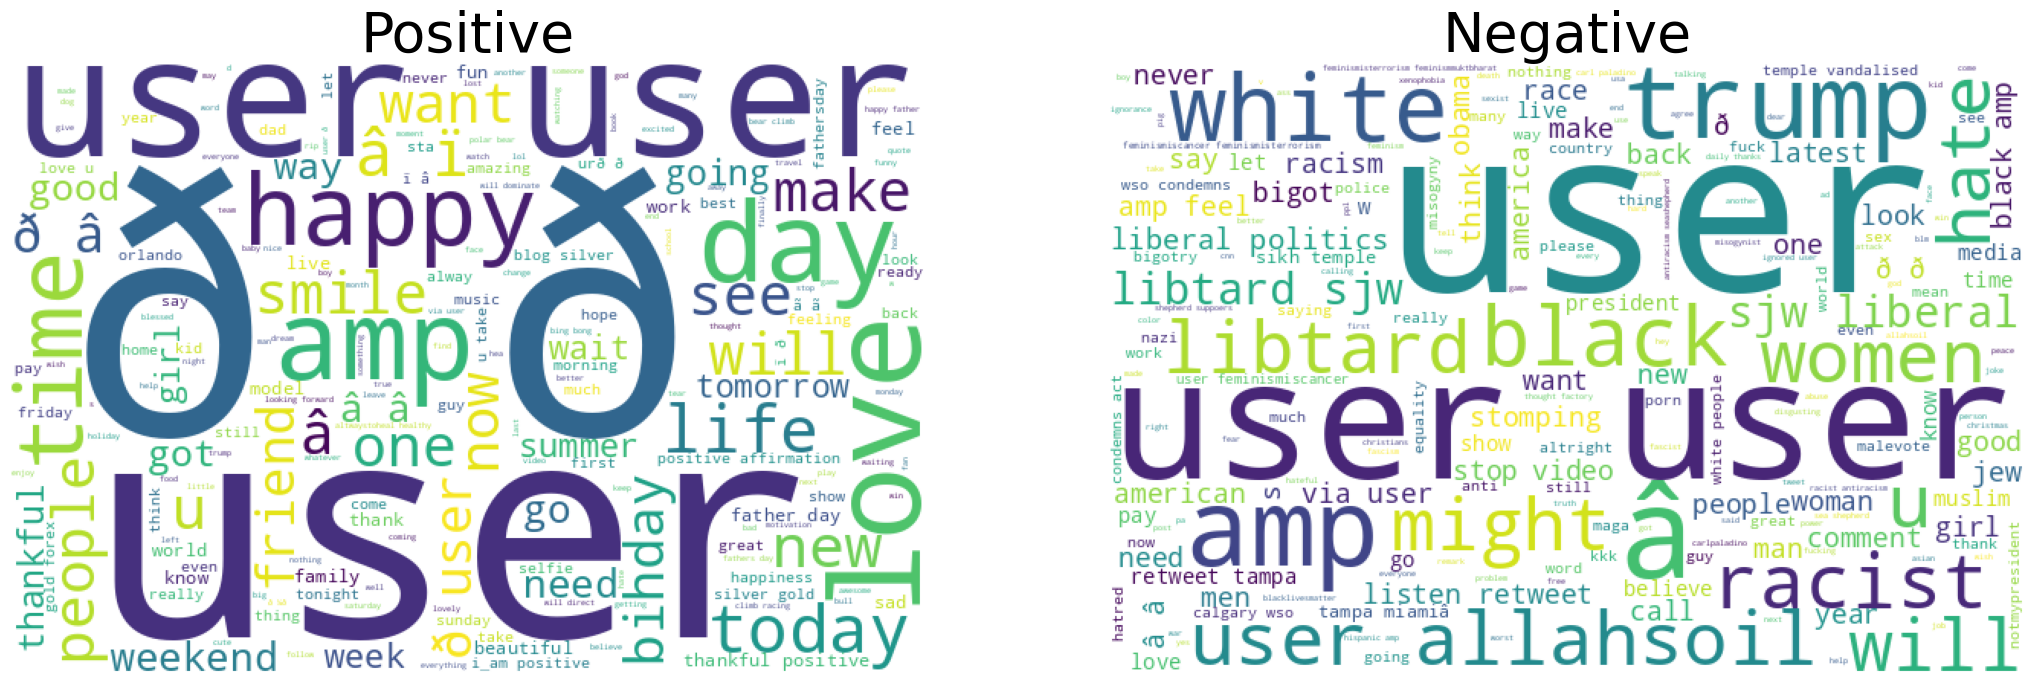

In [ ]:
def makeWordCloud(bkColor, w, h, series, title, ax):
    wcl = WordCloud(background_color=bkColor,
                    width=w,
                    height=h).generate(" ".join(series))
    ax.imshow(wcl)
    ax.axis('off')
    ax.set_title(title, fontsize=40)
positive = data[data['label']== 0]['tweet']
negative = data[data['label']== 1]['tweet']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
makeWordCloud("white", 600, 400, positive, "Positive", ax1)
makeWordCloud("white", 600, 400, negative, "Negative", ax2)
plt.show()

In [ ]:
def rm_link(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)
def rm_punct2(text):
    return re.sub(r'[\"\#\$\%\&\'\(\)\*\+\/\:\;\<\=\>\@\[\\\]\^\_\`\{\|\}\~]', ' ', text)
def rm_html(text):
    return re.sub(r'<[^>]+>', '', text)
def space_bt_punct(text):
    pattern = r'([.,!?-])'
    s = re.sub(pattern, r' \1 ', text)
    s = re.sub(r'\s{2,}', ' ', s)
    return s
def rm_number(text):
    return re.sub(r'\d+', '', text)
def rm_whitespaces(text):
    return re.sub(r' +', ' ', text)
def rm_nonascii(text):
    return re.sub(r'[^\x00-\x7f]', r'', text)
def rm_emoji(text):
    emojis = re.compile(
        '['
        u'\U0001F600-\U0001F64F'
        u'\U0001F300-\U0001F5FF'
        u'\U0001F680-\U0001F6FF'
        u'\U0001F1E0-\U0001F1FF'
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE
    )
    return emojis.sub(r'', text)
def spell_correction(text):
    return re.sub(r'(.)\1+', r'\1\1', text)
def clean_pipeline(text):
    no_link = rm_link(text)
    no_html = rm_html(no_link)
    space_punct = space_bt_punct(no_html)
    no_punct = rm_punct2(space_punct)
    no_number = rm_number(no_punct)
    no_whitespaces = rm_whitespaces(no_number)
    no_nonasci = rm_nonascii(no_whitespaces)
    no_emoji = rm_emoji(no_nonasci)
    spell_corrected = spell_correction(no_emoji)
    return spell_corrected

In [ ]:
#Clean Dataset
def clean_str(string):


    #EMOJIS
    string = re.sub(r":\)","emojihappy1",string)
    string = re.sub(r":P","emojihappy2",string)
    string = re.sub(r":p","emojihappy3",string)
    string = re.sub(r":>","emojihappy4",string)
    string = re.sub(r":3","emojihappy5",string)
    string = re.sub(r":D","emojihappy6",string)
    string = re.sub(r" XD ","emojihappy7",string)
    string = re.sub(r" <3 ","emojihappy8",string)

    string = re.sub(r":\(","emojisad9",string)
    string = re.sub(r":<","emojisad10",string)
    string = re.sub(r":<","emojisad11",string)
    string = re.sub(r">:\(","emojisad12",string)

    #MENTIONS "(@)\w+"
    string = re.sub(r"(@)\w+","mentiontoken",string)

    #WEBSITES
    string = re.sub(r"http(s)*:(\S)*","linktoken",string)

    #STRANGE UNICODE \x...
    string = re.sub(r"\\x(\S)*","",string)

    #General Cleanup and Symbols
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)

    return string.strip().lower()

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def tokenize(text):
    return word_tokenize(text)
def rm_stopwords(text):
    return [i for i in text if i not in stopwords]
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(t) for t in text]
    return rm_stopwords(lemmas)
def preprocess_pipeline(text):
    tokens = tokenize(text)
    no_stopwords = rm_stopwords(tokens)
    lemmas = lemmatize(no_stopwords)
    return ' '.join(lemmas)

In [ ]:
data['clean'] = data['tweet'].progress_apply(clean_pipeline)
data['processed'] = data['clean'].progress_apply(preprocess_pipeline)
data.head()

100%|██████████| 21602/21602 [00:07<00:00, 2941.98it/s]


,id,label,tweet,token_length,clean,processed
0,1,0,@user when a father is dysfunctional and is s...,18,user when a father is dysfunctional and is so...,user father dysfunctional selfish drag kid dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,19,user user thanks for lyft credit i can t use ...,user user thanks lyft credit use cause offer w...
2,3,0,bihday your majesty,3,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,14,model i love u take with u all the time in ur...,model love u take u time ur ! ! !
4,5,0,factsguide: society now #motivation,4,factsguide society now motivation,factsguide society motivation


In [ ]:
data[['processed', 'label']].to_csv('tweet.csv', index=False, header=True)

In [ ]:
reviews = data.processed.values
words = ' '.join(reviews)
words = words.split()
words[:10]

['user',
 'father',
 'dysfunctional',
 'selfish',
 'drag',
 'kid',
 'dysfunction',
 '.',
 'run',
 'user']

In [ ]:
from tqdm import tqdm
tqdm.pandas()
from collections import Counter

In [ ]:
counter = Counter(words)
vocab = sorted(counter, key=counter.get, reverse=True)
int2word = dict(enumerate(vocab, 1))
int2word[0] = '<PAD>'
word2int = {word: id for id, word in int2word.items()}

In [ ]:
reviews_enc = [[word2int[word] for word in review.split()] for review in tqdm(reviews)]
for i in range(5):
    print(reviews_enc[i][:5])

100%|██████████| 21602/21602 [00:00<00:00, 69467.61it/s]

[2, 20, 10482, 2223, 3271]
[2, 2, 103, 4391, 1693]
[22, 3273]
[78, 7, 10, 31, 10]
[2905, 1310, 213]


In [ ]:
def pad_features(reviews, pad_id, seq_length=128):
    features = np.full((len(reviews), seq_length), pad_id, dtype=int)
    for i, row in enumerate(reviews):
        features[i, :len(row)] = np.array(row)[:seq_length]
    return features
seq_length = 500
features = pad_features(reviews_enc, pad_id=word2int['<PAD>'], seq_length=seq_length)
assert len(features) == len(reviews_enc)
assert len(features[0]) == seq_length
features[:10, :10]

array([[    2,    20, 10482,  2223,  3271,   130, 10483,     1,   342,
            0],
       [    2,     2,   103,  4391,  1693,   315,   513,  1065,  6890,
         3272],
       [   22,  3273,     0,     0,     0,     0,     0,     0,     0,
            0],
       [   78,     7,    10,    31,    10,    13,    65,     3,     3,
            3],
       [ 2905,  1310,   213,     0,     0,     0,     0,     0,     0,
            0],
       [  734,   215,  4392,   190,   542,   253,     1,  3758,    99,
        10485],
       [    2,  2057,    58,     2,     2,     2,     2,     2,     2,
            2],
       [   80,   149,    41,    41,  1066,     1,    66,   149,  1066,
          136],
       [    3,     3,     3,     7,   929,     3,     3,     3,  4393,
         1199],
       [    2,     2,   573,     3,  2640,     3,     0,     0,     0,
            0]])

In [ ]:
labels = data.label.to_numpy()
labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
maxlen=500

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_size = 0.7
val_size = 0.5
split_id = int(len(features) * train_size)
train_x, remain_x, train_y, remain_y = train_test_split(features, labels, test_size=0.3, random_state=42, shuffle=True)
val_x, test_x, val_y, test_y = train_test_split(remain_x, remain_y, test_size=0.5, random_state=42, shuffle=True)

# train_x, remain_x = features[:split_id], features[split_id:]
# train_y, remain_y = labels[:split_id], labels[split_id:]
# split_val_id = int(len(remain_x) * val_size)
# val_x, test_x = remain_x[:split_val_id], remain_x[split_val_id:]
# val_y, test_y = remain_y[:split_val_id], remain_y[split_val_id:]
print('Feature Shapes:')
print('Train set: {}'.format(train_x.shape))
print('Validation set: {}'.format(val_x.shape))
print('Test set: {}'.format(test_x.shape))

Feature Shapes:
Train set: (15121, 500)
Validation set: (3240, 500)
Test set: (3241, 500)


In [ ]:
xtrain=np.asarray(train_x).astype('float32')
xtest=np.asarray(test_x).astype('float32')
ytrain=np.asarray(train_y).astype('float32')
ytest=np.asarray(test_y).astype('float32')
ytest=np.asarray(test_y).astype('float32')
xval=np.asarray(val_x).astype('float32')
yval=np.asarray(val_y).astype('float32')
train=tf.data.Dataset.from_tensor_slices((xtrain,ytrain)).batch(128)
test=tf.data.Dataset.from_tensor_slices((xtest,ytest)).batch(128)
val=tf.data.Dataset.from_tensor_slices((xval,yval)).batch(128)


In [ ]:
xtrain=np.asarray(xtrain).astype('float32')
xtest=np.asarray(xtest).astype('float32')
ytrain=np.asarray(ytrain).astype('float32')
ytest=np.asarray(ytest).astype('float32')
print(xtrain.shape,xtest.shape)
print(ytrain.shape,ytest.shape)

(15121, 500) (3241, 500)
(15121,) (3241,)


In [ ]:
vocab_size = 35125
vocab_size

35125

In [ ]:
inputs = Input(shape=(maxlen,))
embedding = Embedding(vocab_size, 32,trainable=True)(inputs)
#channel 1
x = Conv1D(filters=128, kernel_size=3*32, activation='relu')(embedding)
x= MaxPooling1D(pool_size=2)(x)
x= Dropout(0.5)(x)
x= BatchNormalization()(x)
a=LSTM(128)(x)

# channel 2
x = Conv1D(filters=128, kernel_size=5*32, activation='relu')(embedding)
x= MaxPooling1D(pool_size=2)(x)
x= Dropout(0.5)(x)
x= BatchNormalization()(x)
b=LSTM(128)(x)

# channel 3
x = Conv1D(filters=128, kernel_size=7*32, activation='relu')(embedding)
x= MaxPooling1D(pool_size=2)(x)
x= Dropout(0.5)(x)
x= BatchNormalization()(x)
c=LSTM(128)(x)

# channel 4
x = Conv1D(filters=128, kernel_size=9*32, activation='relu')(embedding)
x= MaxPooling1D(pool_size=2)(x)
x= Dropout(0.5)(x)
x= BatchNormalization()(x)
d=LSTM(128)(x)

merged=concatenate([a,b,c,d])
dense=Dense(100, activation='relu')(merged)
drop=Dropout(0.2)(dense)
outputs = Dense(1, activation='sigmoid')(merged)
#model
model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 500)]                0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 500, 32)              1124000   ['input_3[0][0]']             
                                                                                                  
 conv1d_4 (Conv1D)           (None, 405, 128)             393344    ['embedding_1[0][0]']         
                                                                                                  
 conv1d_5 (Conv1D)           (None, 341, 128)             655488    ['embedding_1[0][0]']         
                                                                                            

In [ ]:

opt=RMSprop(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
hist=model.fit(xtrain,ytrain,batch_size=256,epochs=5,validation_data=(xval,yval),validation_batch_size=256)

Epoch 1/5
88/88 [==============================] - 42s 388ms/step - loss: 0.2751 - accuracy: 0.9239 - val_loss: 0.2624 - val_accuracy: 0.9266
Epoch 2/5
88/88 [==============================] - 32s 358ms/step - loss: 0.2550 - accuracy: 0.9304 - val_loss: 0.2666 - val_accuracy: 0.9266
Epoch 3/5
88/88 [==============================] - 33s 372ms/step - loss: 0.2551 - accuracy: 0.9304 - val_loss: 0.2671 - val_accuracy: 0.9266
Epoch 4/5
88/88 [==============================] - 33s 374ms/step - loss: 0.2544 - accuracy: 0.9304 - val_loss: 0.2625 - val_accuracy: 0.9266
Epoch 5/5
88/88 [==============================] - 33s 375ms/step - loss: 0.2540 - accuracy: 0.9304 - val_loss: 0.2631 - val_accuracy: 0.9266


In [ ]:
model.evaluate(xtest, ytest)

150/150 [==============================] - 3s 18ms/step - loss: 0.2531 - accuracy: 0.9308


[0.25307703018188477, 0.9307612180709839]

In [ ]:
y_out = model.predict(xtest)
y_pre = np.array([1 if i > 0.5 else 0 for i in y_out])
cm = confusion_matrix(y_true=ytest, y_pred=y_pre)

150/150 [==============================] - 4s 16ms/step


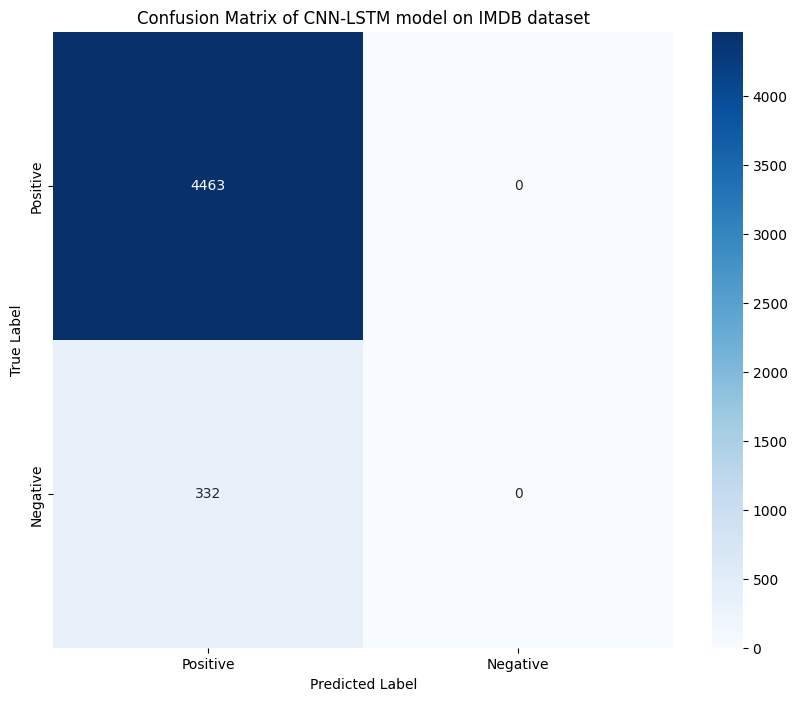

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', "Negative"], yticklabels=['Positive', "Negative"])
plt.title(f'Confusion Matrix of CNN-LSTM model on Tweet dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()